# Jaringan Syaraf Tiruan Menggunakan Algoritma Backpropagation untuk Memprediksi Prestasi Siswa

## Import Data

In [1]:
import pandas as pd

df = pd.read_excel('dataset/all.xlsx', index_col='nisn')
df

,id,nama,jurusan,indo1,indo2,indo3,indo4,inggris1,inggris2,inggris3,inggris4,mtk1,mtk2,mkt3,mkt4,indo,mtk,inggris
nisn,,,,,,,,,,,,,,,,,,
3049699097,1,Fatikhatul Khusna,TKI,80,85,80,80,82,81,85,85,81,81,78,78,82,80,83
61630300,2,Abdul mufid,TKI,80,88,80,80,79,79,90,80,79,79,84,78,78,80,80
43998191,3,Ade Firmansyah,TKI,80,88,80,80,79,79,90,80,79,79,84,78,78,80,84
3040508393,4,A. FAIZAL UMAM,TKI,80,88,80,80,79,79,90,80,79,79,84,78,86,80,82
3067947891,5,Akmal Fatahilah,TKI,80,88,80,80,79,79,90,80,79,79,84,78,84,80,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56376210,84,Sepita Hanatasya,BDP,80,88,80,80,80,82,88,84,81,82,78,78,82,82,84
3065869370,85,SHERLIE AMELIA RAMADANI,BDP,80,88,80,80,80,82,88,84,81,82,78,78,78,80,83
66843141,86,WIDIAWATI,BDP,80,88,80,80,80,82,88,84,81,82,78,78,82,80,83


In [2]:
df.describe()

,id,indo1,indo2,indo3,indo4,inggris1,inggris2,inggris3,inggris4,mtk1,mtk2,mkt3,mkt4,indo,mtk,inggris
count,88.000000,88.000000,88.000000,88.000000,88.0,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,44.500000,80.056818,87.875000,80.090909,80.0,79.318182,79.681818,89.284091,80.977273,79.534091,79.670455,82.522727,78.011364,80.340909,79.931818,81.397727
std,25.547342,0.533002,0.907346,0.852803,0.0,0.652941,1.246102,1.715037,1.761512,1.027762,1.256904,2.581888,0.106600,2.989969,1.132543,8.955240
min,1.000000,80.000000,80.000000,80.000000,80.0,79.000000,79.000000,80.000000,80.000000,79.000000,78.000000,78.000000,78.000000,78.000000,78.000000,0.000000
25%,22.750000,80.000000,88.000000,80.000000,80.0,79.000000,79.000000,89.500000,80.000000,79.000000,79.000000,83.000000,78.000000,78.000000,79.000000,81.000000
50%,44.500000,80.000000,88.000000,80.000000,80.0,79.000000,79.000000,90.000000,80.000000,79.000000,79.000000,84.000000,78.000000,80.000000,80.000000,83.000000
75%,66.250000,80.000000,88.000000,80.000000,80.0,79.250000,79.000000,90.000000,80.000000,79.250000,79.000000,84.000000,78.000000,82.000000,80.250000,84.000000
max,88.000000,85.000000,88.000000,88.000000,80.0,82.000000,82.000000,90.000000,85.000000,85.000000,82.000000,84.000000,79.000000,92.000000,83.000000,90.000000


## Visualisasi data

KeyError: "['mtk3', 'mtk4'] not in index"

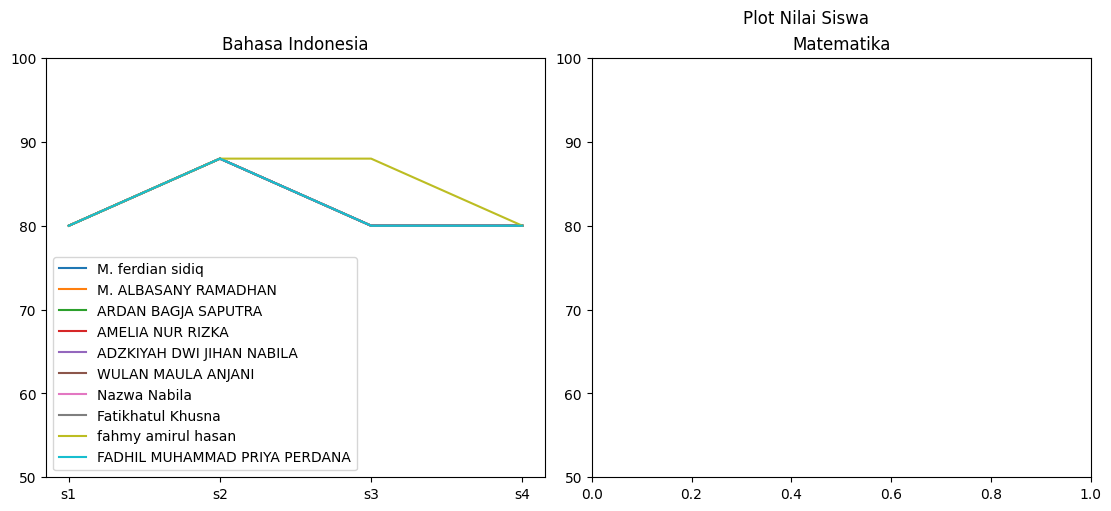

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data

fig = plt.figure(figsize=(16,5), constrained_layout = True)
fig.suptitle('Plot Nilai Siswa')

label = ["Bahasa Indonesia", "Matematika", "Bahasa Inggris"]

mapel = ["indo", "mtk", "inggris"]
for m in mapel:
    ax = fig.add_subplot(1, 3, mapel.index(m) + 1)
    ax.set_title(label[mapel.index(m)])
    ax.set_ylim(50, 100)
    dtampil = 10
    for j in range(dtampil):
        ax.plot(['s1', 's2', 's3', 's4'], df.sample(dtampil)[[f'{m}1', f'{m}2', f'{m}3', f'{m}4']].values[j], label=df.sample(dtampil)['nama'].values[j])
    ax.legend()

## Split Data

In [311]:
X = data_inggris[['s1', 's2', 's3', 's4']].values
y = data_inggris['s5'].values

print(X)
print(y)

[[82 81 85 85]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [82 80 80 85]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [82 79 80 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90 80]
 [79 79 90

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70, 4) (18, 4) (70,) (18,)


## Pelatihan

In [313]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

regr = MLPRegressor(random_state=0, max_iter=1000, hidden_layer_sizes=(32, 64), learning_rate_init=0.02, alpha=0.02).fit(X_train, y_train)

y_pred = regr.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(y_pred)
print(y_test)

3.9686744464060073
0.02656204291475926
[76.99215322 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322
 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322
 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322 76.99215322]
[75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75]


In [314]:
preddf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
preddf

,Actual,Predicted
0,75,76.992153
1,75,76.992153
2,75,76.992153
3,75,76.992153
4,75,76.992153
5,75,76.992153
6,75,76.992153
7,75,76.992153
8,75,76.992153
9,75,76.992153


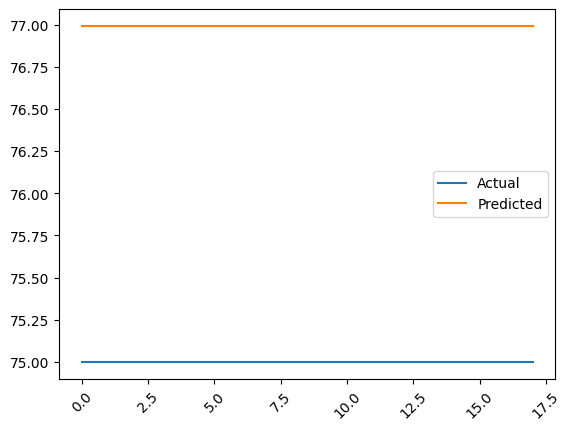

In [315]:
import matplotlib.pyplot as plt

# get last len(y_test) data
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.xticks(rotation=45)
plt.legend()

In [316]:
regr.score(X_test, y_test)

0.0

In [3]:
import pandas as pd

df = pd.read_excel("dataset/all.xlsx")
df.iloc[0]

id                          1
nisn               3049699097
nama        Fatikhatul Khusna
jurusan                   TKI
indo1                      80
indo2                      85
indo3                      80
indo4                      80
inggris1                   82
inggris2                   81
inggris3                   85
inggris4                   85
mtk1                       81
mtk2                       81
mkt3                       78
mkt4                       78
indo                       82
mtk                        80
inggris                    83
Name: 0, dtype: object